# Are You Bored Yet?
I Sure hope not! :-)

### Setting Up One and Alyx

In [124]:
%pip install ONE-api --quiet
%pip install ibllib --quiet
import numpy as np
import pandas as pd

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [125]:
from one.api import ONE

ONE.setup(base_url='https://openalyx.internationalbrainlab.org', silent=True)
one = ONE(password='international')


Connected to https://openalyx.internationalbrainlab.org as user "intbrainlab"


The Experiment has Subjects, each subject has various Sessions, and each Session has trials.
I have made the model for the first Subject, compiling all its sessions into one dataframe and thus training the model on all of its trials.

In [126]:
datasets = one.alyx.rest('datasets', 'list', tag='2021_Q1_IBL_et_al_Behaviour', name='_ibl_subjectTrials.table.pqt')
subjects = np.unique([d['file_records'][0]['relative_path'].split('/')[2] for d in datasets])

# Load in the subjectTrials table and sessionTrials table for the first subject
subject = subjects[0]
subject_trials = one.load_aggregate('subjects', subject, '_ibl_subjectTrials.table')
session_trials = one.load_aggregate('subjects', subject, '_ibl_subjectSessions.table')
with pd.option_context('display.max_columns', None):
    display(subject_trials.head())


,intervals_0,intervals_1,goCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,feedback_times,feedbackType,rewardVolume,probabilityLeft,firstMovement_times,goCueTrigger_times,stimOnTrigger_times,stimOffTrigger_times,stimFreezeTrigger_times,stimOff_times,stimFreeze_times,phase,position,quiescence,session,task_protocol,protocol_number,session_start_time
0,0.0000,89.642702,6.9477,12.0563,1.0,6.9297,1.0,NaN,12.0563,1.0,3.0,0.5,NaN,6.9298,6.8318,13.0563,NaN,13.1188,7.0596,0.000000,-35,0.639317,b117ed10-6871-42b3-9193-ca708dac4353,trainingChoiceWorld,0,2019-11-04 09:29:50.380830
1,90.2706,100.694903,90.8707,99.1949,1.0,90.8403,1.0,NaN,99.1949,1.0,3.0,0.5,99.027406,90.8404,90.7584,100.1949,NaN,100.2714,99.2412,0.552481,-35,0.445501,b117ed10-6871-42b3-9193-ca708dac4353,trainingChoiceWorld,0,2019-11-04 09:29:50.380830
2,101.6900,109.067302,102.2129,107.5673,-1.0,102.1760,NaN,0.5,107.5673,1.0,3.0,0.5,107.164406,102.1761,102.1034,108.5673,NaN,108.6281,107.6268,0.196815,35,0.413207,b117ed10-6871-42b3-9193-ca708dac4353,trainingChoiceWorld,0,2019-11-04 09:29:50.380830
3,109.5048,121.653802,116.0801,119.1538,1.0,116.0465,NaN,1.0,119.1865,-1.0,0.0,0.5,118.918406,116.0466,115.9533,121.1538,NaN,121.2151,119.2345,0.396885,35,0.649984,b117ed10-6871-42b3-9193-ca708dac4353,trainingChoiceWorld,0,2019-11-04 09:29:50.380830
4,122.2313,129.362803,125.2503,127.8628,1.0,125.2174,1.0,NaN,127.8628,1.0,3.0,0.7,127.553406,125.2175,125.1444,128.8628,NaN,128.9343,127.9333,2.169886,-35,0.419072,b117ed10-6871-42b3-9193-ca708dac4353,trainingChoiceWorld,0,2019-11-04 09:29:50.380830


### EDA and Making the Main Dataframe of all Trials

In [127]:
session_trials.head()

,lab,subject,date,number,task_protocol,projects
id,,,,,,
7939711b-8b4d-4251-b698-b97c1eaa846e,churchlandlab,CSHL045,2020-02-28,1,_iblrig_tasks_ephysChoiceWorld6.4.0,ibl_neuropixel_brainwide_01
46794e05-3f6a-4d35-afb3-9165091a5a74,churchlandlab,CSHL045,2020-02-27,1,_iblrig_tasks_ephysChoiceWorld6.4.0,ibl_neuropixel_brainwide_01
fa704052-147e-46f6-b190-a65b837e605e,churchlandlab,CSHL045,2020-02-26,1,_iblrig_tasks_ephysChoiceWorld6.2.5,ibl_neuropixel_brainwide_01
dfd8e7df-dc51-4589-b6ca-7baccfeb94b4,churchlandlab,CSHL045,2020-02-25,2,_iblrig_tasks_ephysChoiceWorld6.2.5,ibl_neuropixel_brainwide_01
034e726f-b35f-41e0-8d6c-a22cc32391fb,churchlandlab,CSHL045,2020-02-24,1,_iblrig_tasks_ephysChoiceWorld6.2.5,ibl_neuropixel_brainwide_01


I did EDA to check out what columns are in both the dataframes, now i will copy them to one DataFrame that I would be using

In [128]:
if 'task_protocol' in subject_trials:
    subject_trials = subject_trials.drop('task_protocol', axis=1)
subject_trials = subject_trials.set_index('session').join(session_trials.drop('date', axis=1))


In [129]:
subjects.shape

(140,)

In [130]:
# Find the number of sessions for this subject
n_sessions = subject_trials.index.unique().size
print(f'Subject {subject} has {n_sessions} sessions')

# Find the number of times a task protocol was run
n_protocols = subject_trials[~subject_trials.index.duplicated()].task_protocol.value_counts()
print(n_protocols)

Subject CSHL045 has 76 sessions
task_protocol
_iblrig_tasks_biasedChoiceWorld6.3.1      17
_iblrig_tasks_trainingChoiceWorld6.1.3    14
_iblrig_tasks_trainingChoiceWorld6.2.5    12
_iblrig_tasks_trainingChoiceWorld6.3.1    11
_iblrig_tasks_biasedChoiceWorld6.2.5       6
_iblrig_tasks_ephysChoiceWorld6.2.5        3
_iblrig_tasks_trainingChoiceWorld6.2.4     3
_iblrig_tasks_trainingChoiceWorld6.0.6     3
_iblrig_tasks_trainingChoiceWorld6.2.1     2
_iblrig_tasks_ephysChoiceWorld6.4.0        2
_iblrig_tasks_trainingChoiceWorld6.2.0     1
_iblrig_tasks_trainingChoiceWorld6.1.1     1
_iblrig_tasks_trainingChoiceWorld6.1.2     1
Name: count, dtype: int64


In [131]:
# Get the trials data for all sessions with biased choice world protocol
all = []
sess = subject_trials[subject_trials['task_protocol'].str.contains('biasedChoiceWorld')].index.unique()
for i in range(23):
     trials = subject_trials[subject_trials.index == sess[i]]
     all.append(trials)
all_trials = pd.concat(all, ignore_index=False)
all_trials['task_protocol'].value_counts()
all_trials = all_trials.reset_index()

Number of trials for session Index(['a4f7079b-d157-4de9-ba80-de9a98f35c8b',
       '1a559aac-f6dd-47c8-bccb-53b4ae5af509',
       'f8db8924-0e05-4d35-aed4-739021e36c91',
       '24049078-0aaf-420d-bf75-e5d63182dd02',
       'e274533c-dba9-435e-890b-3b3e481a8b60',
       'f187f8c5-d445-4c76-bcf6-d5e7035d112d',
       '8ee1306a-f1bc-4cab-81b2-c2ee164ca1da',
       '8019f434-f071-4da0-acae-64dc608008b6',
       '85501aad-64e6-4137-a44e-2c933c9eec5f',
       '81362661-8f80-45b1-90ad-749251c9fe13',
       'f1c65059-8c2e-478b-81f1-2a559b13a581',
       '5d24cc4e-6a45-47f7-9958-e08399799d7a',
       'b046a636-5e3f-4e72-bb53-afab7482da13',
       'daae4a9b-d2f6-4924-92df-619a180c683f',
       'abc1c56c-324e-40e1-ac23-147e51a1c427',
       'a55aafed-b496-49fb-8948-680695f806d5',
       'a1452769-543a-4b20-8ea1-690780bd3ff9',
       'b88016fd-146a-4238-ac7c-ab8e3e1264bf',
       '52739513-f095-4c05-bd87-8ae92bf04924',
       'fcfe7f65-2516-4706-b848-dc73ff26bfb9',
       '6e37c63c-eb3f-4b07-b493

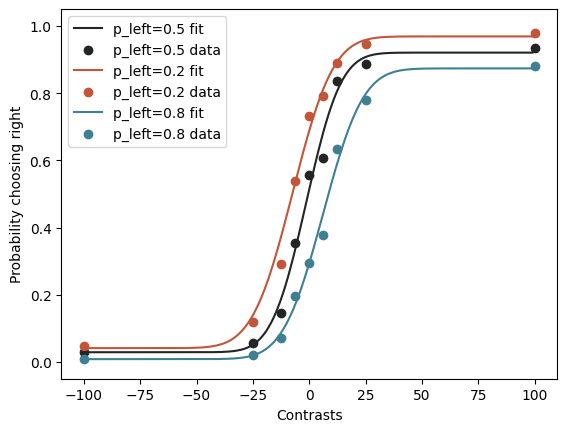

In [132]:
from brainbox.behavior.training import plot_psychometric, compute_n_trials, compute_performance_easy, compute_performance

plot_psychometric(all_trials)
n_trials = compute_n_trials(all_trials)
perf_easy = compute_performance_easy(all_trials)
print(f'Number of trials for session {sess}: {n_trials}')
print(f'Performance easy for session {sess}: {perf_easy}')

In [133]:
with pd.option_context('display.max_columns', None):
    display(all_trials.head())
    

,session,intervals_0,intervals_1,goCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,feedback_times,feedbackType,rewardVolume,probabilityLeft,firstMovement_times,goCueTrigger_times,stimOnTrigger_times,stimOffTrigger_times,stimFreezeTrigger_times,stimOff_times,stimFreeze_times,phase,position,quiescence,protocol_number,session_start_time,lab,subject,number,task_protocol,projects
0,a4f7079b-d157-4de9-ba80-de9a98f35c8b,0.0000,10.582602,5.7094,7.9825,1.0,NaN,NaN,0.0625,8.0115,-1.0,0.0,0.5,7.886327,5.6922,5.5921,9.9826,7.9825,NaN,NaN,0.000000,35,0.501499,0,2020-01-22 09:17:29.099405,churchlandlab,CSHL045,2,_iblrig_tasks_biasedChoiceWorld6.3.1,ibl_neuropixel_brainwide_01
1,a4f7079b-d157-4de9-ba80-de9a98f35c8b,11.0663,14.771902,11.7101,12.2011,1.0,11.6799,NaN,0.0625,12.2314,-1.0,0.0,0.5,12.023327,11.6800,11.5946,14.2012,12.2011,14.2719,12.2797,2.872535,35,0.528192,0,2020-01-22 09:17:29.099405,churchlandlab,CSHL045,2,_iblrig_tasks_biasedChoiceWorld6.3.1,ibl_neuropixel_brainwide_01
2,a4f7079b-d157-4de9-ba80-de9a98f35c8b,15.2211,20.156802,18.0630,18.5762,-1.0,18.0323,NaN,0.2500,18.5763,1.0,1.5,0.5,18.374327,18.0324,17.9581,19.5763,18.5762,19.6568,18.6487,2.836805,35,0.511777,0,2020-01-22 09:17:29.099405,churchlandlab,CSHL045,2,_iblrig_tasks_biasedChoiceWorld6.3.1,ibl_neuropixel_brainwide_01
3,a4f7079b-d157-4de9-ba80-de9a98f35c8b,20.5800,24.817402,21.5136,22.2572,1.0,21.4835,NaN,0.0625,22.2869,-1.0,0.0,0.5,22.132327,21.4836,21.4001,24.2573,22.2572,24.3174,22.3069,3.132839,35,0.635266,0,2020-01-22 09:17:29.099405,churchlandlab,CSHL045,2,_iblrig_tasks_biasedChoiceWorld6.3.1,ibl_neuropixel_brainwide_01
4,a4f7079b-d157-4de9-ba80-de9a98f35c8b,25.2225,28.892902,25.7895,26.3258,1.0,25.7587,NaN,0.0000,26.3548,-1.0,0.0,0.5,26.239327,25.7588,25.6911,28.3259,26.3258,28.3929,26.3841,2.209422,35,0.468476,0,2020-01-22 09:17:29.099405,churchlandlab,CSHL045,2,_iblrig_tasks_biasedChoiceWorld6.3.1,ibl_neuropixel_brainwide_01


### Feature Engineering

In [134]:
# Reaction time is time between stimulus on and first movement
all_trials['reaction_time'] = all_trials['firstMovement_times'] - all_trials['goCueTrigger_times']
all_trials.head()

,session,intervals_0,intervals_1,goCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,feedback_times,...,position,quiescence,protocol_number,session_start_time,lab,subject,number,task_protocol,projects,reaction_time
0,a4f7079b-d157-4de9-ba80-de9a98f35c8b,0.0000,10.582602,5.7094,7.9825,1.0,NaN,NaN,0.0625,8.0115,...,35,0.501499,0,2020-01-22 09:17:29.099405,churchlandlab,CSHL045,2,_iblrig_tasks_biasedChoiceWorld6.3.1,ibl_neuropixel_brainwide_01,2.194127
1,a4f7079b-d157-4de9-ba80-de9a98f35c8b,11.0663,14.771902,11.7101,12.2011,1.0,11.6799,NaN,0.0625,12.2314,...,35,0.528192,0,2020-01-22 09:17:29.099405,churchlandlab,CSHL045,2,_iblrig_tasks_biasedChoiceWorld6.3.1,ibl_neuropixel_brainwide_01,0.343327
2,a4f7079b-d157-4de9-ba80-de9a98f35c8b,15.2211,20.156802,18.0630,18.5762,-1.0,18.0323,NaN,0.2500,18.5763,...,35,0.511777,0,2020-01-22 09:17:29.099405,churchlandlab,CSHL045,2,_iblrig_tasks_biasedChoiceWorld6.3.1,ibl_neuropixel_brainwide_01,0.341927
3,a4f7079b-d157-4de9-ba80-de9a98f35c8b,20.5800,24.817402,21.5136,22.2572,1.0,21.4835,NaN,0.0625,22.2869,...,35,0.635266,0,2020-01-22 09:17:29.099405,churchlandlab,CSHL045,2,_iblrig_tasks_biasedChoiceWorld6.3.1,ibl_neuropixel_brainwide_01,0.648727
4,a4f7079b-d157-4de9-ba80-de9a98f35c8b,25.2225,28.892902,25.7895,26.3258,1.0,25.7587,NaN,0.0000,26.3548,...,35,0.468476,0,2020-01-22 09:17:29.099405,churchlandlab,CSHL045,2,_iblrig_tasks_biasedChoiceWorld6.3.1,ibl_neuropixel_brainwide_01,0.480527


In [135]:
def featureEngineering(df):
    df = df.sort_values(['session', 'session_start_time'])
    
    # Calculate Inter-trial delay (ITD) only for rows where the session is the same
    df['ITD'] = df['intervals_1'] - df['intervals_0']
    
    trial_counts = df.groupby('session').size()
    #print(f"{trial_counts}") commented this since i have no idea how to use this in anything ahead
    
    df['correct'] = df['feedbackType']
    # Rolling accuracy drop
    df['rolling_accuracy'] = df['correct'].rolling(window=40, min_periods=1).mean()
    # Performance drop from session start
    start_acc = df.groupby('session')['correct'].transform(lambda x: x.expanding().mean())
    df['performance_drop'] = start_acc - df['rolling_accuracy']
    
    #Feature I made - Avg Number of times mice didn't take any action in the last 20 trials
    df['leaveFrequency'] = df['choice'].eq(0).rolling(window = 20, min_periods=1).mean()
    
    return df

In [136]:
all_features = featureEngineering(all_trials)
all_features

,session,intervals_0,intervals_1,goCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,feedback_times,...,subject,number,task_protocol,projects,reaction_time,ITD,correct,rolling_accuracy,performance_drop,leaveFrequency
682,1a559aac-f6dd-47c8-bccb-53b4ae5af509,0.000000,10.457102,5.961100,7.857000,-1.0,NaN,0.1250,NaN,7.887000,...,CSHL045,1,_iblrig_tasks_biasedChoiceWorld6.3.1,ibl_neuropixel_brainwide_01,1.853025,10.457102,-1.0,-1.000000,0.000000,0.0
683,1a559aac-f6dd-47c8-bccb-53b4ae5af509,10.914200,13.522002,11.685700,11.951000,1.0,11.654900,1.0000,NaN,11.951100,...,CSHL045,1,_iblrig_tasks_biasedChoiceWorld6.3.1,ibl_neuropixel_brainwide_01,0.201325,2.607802,1.0,0.000000,0.000000,0.0
684,1a559aac-f6dd-47c8-bccb-53b4ae5af509,13.922500,16.346901,14.424000,14.780900,-1.0,14.396500,NaN,1.0000,14.781000,...,CSHL045,1,_iblrig_tasks_biasedChoiceWorld6.3.1,ibl_neuropixel_brainwide_01,0.239725,2.424401,1.0,0.333333,0.000000,0.0
685,1a559aac-f6dd-47c8-bccb-53b4ae5af509,16.761800,21.481802,19.587300,19.913600,1.0,19.557700,0.1250,NaN,19.913700,...,CSHL045,1,_iblrig_tasks_biasedChoiceWorld6.3.1,ibl_neuropixel_brainwide_01,0.014525,4.720002,1.0,0.500000,0.000000,0.0
686,1a559aac-f6dd-47c8-bccb-53b4ae5af509,21.910700,24.675501,22.605700,23.095300,-1.0,22.574900,NaN,0.0625,23.095400,...,CSHL045,1,_iblrig_tasks_biasedChoiceWorld6.3.1,ibl_neuropixel_brainwide_01,0.248325,2.764801,1.0,0.600000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18892,fcfe7f65-2516-4706-b848-dc73ff26bfb9,4066.022899,4073.125801,4069.610599,4070.553599,-1.0,4069.609699,0.2500,NaN,4070.554599,...,CSHL045,1,_iblrig_tasks_biasedChoiceWorld6.2.5,ibl_neuropixel_brainwide_01,0.834999,7.102902,-1.0,0.300000,0.284245,0.1
18893,fcfe7f65-2516-4706-b848-dc73ff26bfb9,4073.844599,4081.126002,4074.660499,4079.556899,-1.0,4074.659499,NaN,0.0000,4079.556999,...,CSHL045,1,_iblrig_tasks_biasedChoiceWorld6.2.5,ibl_neuropixel_brainwide_01,3.195199,7.281403,1.0,0.350000,0.235153,0.1
18894,fcfe7f65-2516-4706-b848-dc73ff26bfb9,4081.822699,4107.225501,4082.793399,4104.660499,-1.0,4082.792599,0.0625,NaN,4104.661399,...,CSHL045,1,_iblrig_tasks_biasedChoiceWorld6.2.5,ibl_neuropixel_brainwide_01,12.179099,25.402802,-1.0,0.300000,0.281699,0.1
18895,fcfe7f65-2516-4706-b848-dc73ff26bfb9,4107.953499,4159.657601,4108.792699,4157.109499,-1.0,4108.791799,0.1250,NaN,4157.110599,...,CSHL045,1,_iblrig_tasks_biasedChoiceWorld6.2.5,ibl_neuropixel_brainwide_01,NaN,51.704102,-1.0,0.250000,0.328261,0.1


### Boredom Score

In [137]:
def compute_boredom_score(df):
    # Smoothed reaction time
    df['rt_smooth'] = (
        df.groupby('session')['reaction_time']
          .rolling(window=30, min_periods=1)
          .mean()
          .reset_index(level=0, drop=True)
    )
    # Dropout indicator
    df['dropout'] = (df['ITD'] > 5.0).astype(int)
    
    # Combined raw boredom: smoothed RT plus weighted dropout
    df['boredom_raw'] = 0.8*df['rt_smooth'] + 0.3*df['dropout'] * df['reaction_time'] + 0.4*df['leaveFrequency']*df['reaction_time'] - 2*df['correct']
    df['boredom_smooth'] = (
      df.groupby('session')['boredom_raw']
          .rolling(window=30, min_periods=1)
          .mean()
          .reset_index(level=0, drop=True)
      
    )
    # Normalize within session
    df['boredom_norm'] = (
        df.groupby('session')['boredom_smooth']
          .transform(lambda x: (x - x.mean()) / (x.std() + 1e-6))
    )
    return df

In [138]:
all_score = compute_boredom_score(all_features)
all_score.head()


,session,intervals_0,intervals_1,goCue_times,response_times,choice,stimOn_times,contrastLeft,contrastRight,feedback_times,...,ITD,correct,rolling_accuracy,performance_drop,leaveFrequency,rt_smooth,dropout,boredom_raw,boredom_smooth,boredom_norm
682,1a559aac-f6dd-47c8-bccb-53b4ae5af509,0.0000,10.457102,5.9611,7.8570,-1.0,NaN,0.125,NaN,7.8870,...,10.457102,-1.0,-1.000000,0.0,0.0,1.853025,1,4.038327,4.038327,9.202475
683,1a559aac-f6dd-47c8-bccb-53b4ae5af509,10.9142,13.522002,11.6857,11.9510,1.0,11.6549,1.000,NaN,11.9511,...,2.607802,1.0,0.000000,0.0,0.0,1.027175,0,-1.178260,1.430034,4.295232
684,1a559aac-f6dd-47c8-bccb-53b4ae5af509,13.9225,16.346901,14.4240,14.7809,-1.0,14.3965,NaN,1.0000,14.7810,...,2.424401,1.0,0.333333,0.0,0.0,0.764692,0,-1.388247,0.490607,2.527794
685,1a559aac-f6dd-47c8-bccb-53b4ae5af509,16.7618,21.481802,19.5873,19.9136,1.0,19.5577,0.125,NaN,19.9137,...,4.720002,1.0,0.500000,0.0,0.0,0.577150,0,-1.538280,-0.016615,1.573507
686,1a559aac-f6dd-47c8-bccb-53b4ae5af509,21.9107,24.675501,22.6057,23.0953,-1.0,22.5749,NaN,0.0625,23.0954,...,2.764801,1.0,0.600000,0.0,0.0,0.511385,0,-1.590892,-0.331470,0.981138


### Model Training

In [139]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, roc_auc_score
df_train, df_test = train_test_split(all_score, test_size= 0.3, random_state= 42)

In [140]:
features = ['reaction_time', 'ITD', 'performance_drop', 'correct', 'leaveFrequency']
target   = 'boredom_norm'

X_train = df_train[features]
y_train = df_train[target]
X_test  = df_test[features]
y_test  = df_test[target]

X_train = X_train.dropna()
y_train = y_train.dropna()
X_test = X_test.dropna()
y_test = y_test.dropna()

y_test = y_test.loc[X_test.index]     # making sure that both train and test have same size
y_train = y_train.loc[X_train.index]

In [141]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score , roc_auc_score

reg = RandomForestRegressor(n_estimators=250, random_state=0)
reg.fit(X_train, y_train)



RandomForestRegressor(n_estimators=250, random_state=0)

### Model Evaluation

In [142]:
y_pred = reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"Test MSE: {mse:.4f}")
print(r2_score(y_test, y_pred))


Test MSE: 0.5664
0.4165264355657379


In [143]:
y_threshold = y_train.median()
y_train_class = (y_train > y_threshold).astype(int)
y_test_class  = (y_test  > y_threshold).astype(int)

clf = RandomForestClassifier(n_estimators=200, random_state=42)
clf.fit(X_train, y_train_class)

y_proba = clf.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_test_class, y_proba)
print(f"Test AUC (boredom classifier): {auc:.3f}")


Test AUC (boredom classifier): 0.819


### Data Visualisation

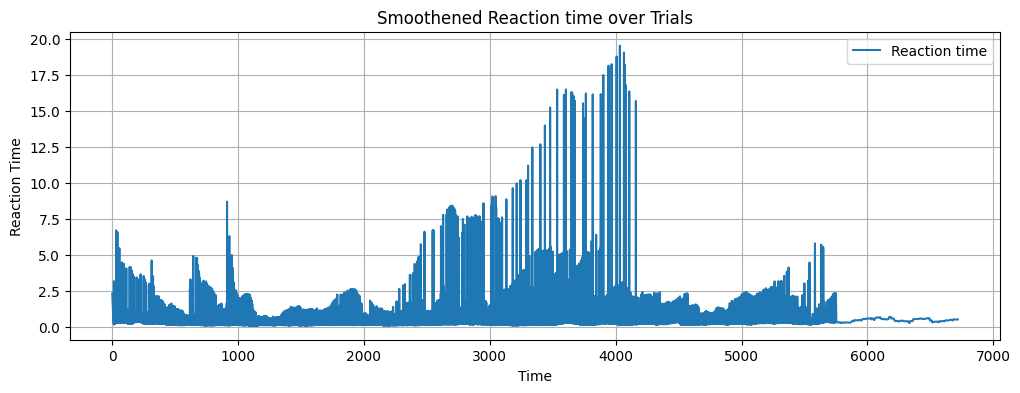

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
sns.lineplot(data=all_score, x='intervals_0', y='rt_smooth', label='Reaction time')
plt.title('Smoothened Reaction time over Trials')
plt.xlabel('Time')
plt.ylabel('Reaction Time')
plt.grid()
plt.show()


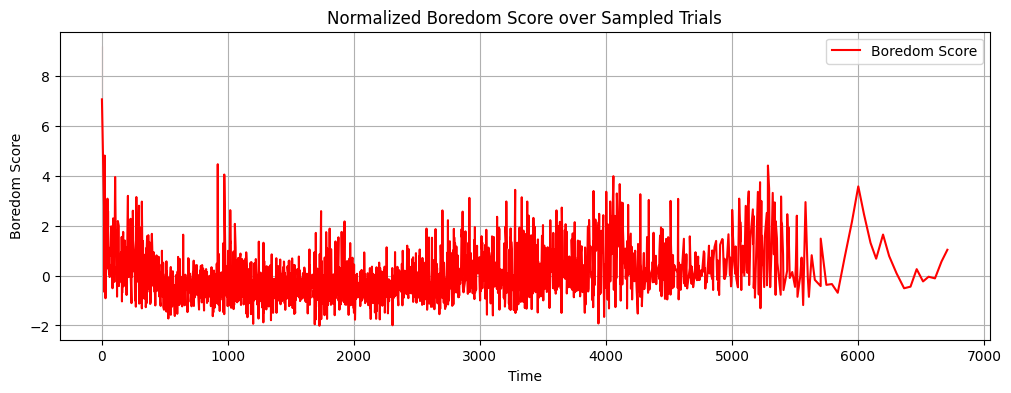

In [145]:
plt.figure(figsize=(12, 4))
sns.lineplot(data=all_score[::10], x='intervals_0', y='boredom_norm', label='Boredom Score', color = 'red')
plt.title('Normalized Boredom Score over Sampled Trials')
plt.xlabel('Time')
plt.ylabel('Boredom Score')
plt.grid()
plt.show()


### Bonus ODE Method of Finding Boredom Score (Not Working Yet)
here we implement the ode solver for a single session

In [146]:
from scipy.integrate import solve_ivp

def boredom_dynamics(t, B, rt_interp, acc_interp,cor_interp, alpha=1.0, beta=1.0, gamma = 1.0):
    rt = rt_interp(t)
    acc = acc_interp(t)
    cor = cor_interp(t)
    
    dBdt = alpha * rt + beta * acc + gamma*cor 
    return dBdt

def simulate_boredom_trajectory(df, alpha=1.0, beta=1.0):
    from scipy.interpolate import interp1d

    # Convert trial indices to a continuous time-like array
    t = np.arange(len(df))
    rt = df['reaction_time'].values
    acc = df['rolling_accuracy'].values
    cor= df['correct'].values

    # Interpolators for ODE solver
    rt_interp = interp1d(t, rt, kind='linear', fill_value='extrapolate')
    acc_interp = interp1d(t, acc, kind='linear', fill_value='extrapolate')
    cor_interp = interp1d(t, cor, kind ='linear', fill_value='extrapolate')
    # Solve the ODE
    sol = solve_ivp(
        boredom_dynamics, t_span=(t[0], t[-1]), y0=[0], t_eval=t,
        args=(rt_interp, acc_interp, alpha, beta)
    )

    df['boredom_ode'] = sol.y[0]
    return df


In [147]:
# df_sample = all_score[all_score['session'].str.contains('1a559aac-f6dd-47c8-bccb-53b4ae5af509')].index
# df_sample = simulate_boredom_trajectory(df_sample)

# plt.figure(figsize=(12, 5))
# plt.plot(df_sample['intervals_0'], df_sample['boredom_ode'], label='ODE Boredom')
# plt.plot(df_sample['intervals_0'], df_sample['boredom_norm'], label='Empirical Boredom', alpha=0.7)
# plt.xlabel('Trial Number')
# plt.ylabel('Boredom Level')
# plt.legend()
# plt.title('ODE vs. Empirical Boredom Trajectory')
# plt.grid(True)
# plt.show()